#  TS2: Sistema Lineales e Invariantes en el Tiempo
## Autora: Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit
### 10/09/2025

# I. **Resumen**

En el presente trabajo se busca hallar la salida a distintos sistemas LTI descritos mediante ecuaciones en diferencias. La entrada propuesta para dichos sistemas son las funciones sintetizadas para el trabajo práctico número 1. Los resultados obtenidos fueron exitosos y su correspondiente análisis se encuentra en las conclusiones.


# II. **Introducción**

Un sistema se define como cualquier grupo de elementos o componentes que operan en una o más señales de entrada para producir una o más señales de salida, de manera tal que se pueden modelar o cuantificar. En el procesamiento de señales digitales, los sistemas suelen ser descritos por ecuaciones en diferencias, que transforman una secuencia de entrada en una de salida. 

## Sistema lineal

Más específicamente, un sistema se considera lineal cuando su salida en respuesta a la sumatoria de un número de entradas es igual a la sumatoria de las respuestas de cada entrada individualmente. Debe satisfacer la propiedad aditiva y de escalamiento.

Propiedad aditiva

La transformación de la suma de las entradas es igual a la suma de la transformada de las entradas. Matemáticamente, se expresa mediante la siguiente ecuación: $ T\{x_1[n]+x_2[n]\} = T\{x_1[n]]\}+T\{x_2[n]\}=y_1[n]+y_2[n] $ 

Propiedad escalativa

La transformación de la entrada escalada es igual a escalar la transformada de la entrada. Se describe mediante la ecuación: $T\{kx[n]\} = kT\{x_1[n]\} $(donde k es una constante).

## Tiempo invariante

Un sistema es tiempo invariante cuando su salida no depende del tiempo absoluto al que la entrada es presentada al sistema.

En resumen, un sistema LTI es aquel que cumple con todas las condiciones mencionadas anteriormente.

## Respuesta al impulso

Para sistemas LTI, la respuesta al impulso caracteriza completamente al sistema, ya que se puede obtener la salida para cualquier entrada mediante la convolución. 

La representación de un sistema suele describirse como $ x[n] \rightarrow T\{ \} \rightarrow y[n]$, donde x es la entrada, y la salida y T la transformada aplicada para convertir la entrada en salida. En el caso especial donde $x[n]= \delta [n] $ la salida se denomina respuesta al impulso h[n]. 

$$
h[n] \triangleq T \{\delta [n] \}
$$

Los sistemas se pueden clasificar según sean de respuesta al impulso finita (FIR), que, como su nombre lo indica, poseen una respuesta al impulso finita en el tiempo, o de respuesta al impulso infinita (IIR). En el primer caso, la relación general entrada-salida se describe como $y[n] = \sum_{k=M}^{N} b_k x[n-k]$, donde b_k, M y N son constantes dadas. De todas formas, en el presente informe nos enfocaremos en el segundo tipo de sistemas. La relación general entrada-salida para un sistema causal IIR es definida por las constantes lineales de las ecuaciones en diferencias. La salida de estos sistemas está dada por la ecuación: $ y[n]= \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k]$. Como se puede apreciar, a diferencia de los sistemas FIR, la salida de los sistemas IIR depende de los valores pasados del output. 

## Convolución 

Cualquier secuencia se puede expresar como $x[n]= \sum_{k=- \infty}^{\infty} x[k] \delta [n-k]$. Por lo tanto, su salida se expresa mediante la siguiente ecuación: $y[n]=T\{x[n]\}= T\{  \sum_{k=- \infty}^{\infty} x[k] \delta [n-k]\}$

Como se mencionó anteriormente, si el sistema es LTI, cumple la propiedad aditiva y de escalamiento, por lo tanto es válido $ y[n]=\sum_{ k=- \infty}^{\infty}x[k] T\{ \delta [n-k]\} =\sum_{ k=- \infty}^{\infty} x[k]h[n-k]$. Esta ecuación es conocida como la suma de la convolución. La salida $y[n]$ se puede calcular mediante la convolución siguiendo la siguiente ecuación:

$$
y[n]=x[n] \ast h[n]
$$



# III. Desarrollo

Se propone hallar la salida a 3 sistemas diferentes, descritos por las siguientes ecuaciones en diferencias:
$$y[n]=3⋅10 ^{−2}⋅x[n]+5⋅10^{−2}⋅x[n−1]+3⋅10^{−2}⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2] $$
$$y[n]=x[n]+3⋅x[n−10]$$
$$y[n]=x[n]+3⋅y[n−10]$$

Para el primer inciso se obtuvo la salida de manera directa, es decir, mediante el cálculo iterativo de la ecuación en diferencias. Se obtuvieron los siguientes resultados:


----Datos item a -------
Tiempo de simulacion: 0.002475 segundos
Potencia de la señal: 0.6524675691197512
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item b -------
Tiempo de simulacion: 0.002475 segundos
Potencia de la señal: 0.824986186543836
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item c -------
Tiempo de simulacion: 0.002475 segundos
Potencia de la señal: 0.24768914315046436
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item d -------
Tiempo de simulacion: 0.002475 segundos
Potencia de la señal: 0.4923355052409162
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item e -------
Tiempo de simulacion: 0.002475 segundos
Potencia de la señal: 0.1725416176107678
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item f -------
Tiempo de simulacion: 0.01 segundos
Potencia de la señal: 4.145988843749998
Frecuencia de muestreo: 40000 Hz
------------------------


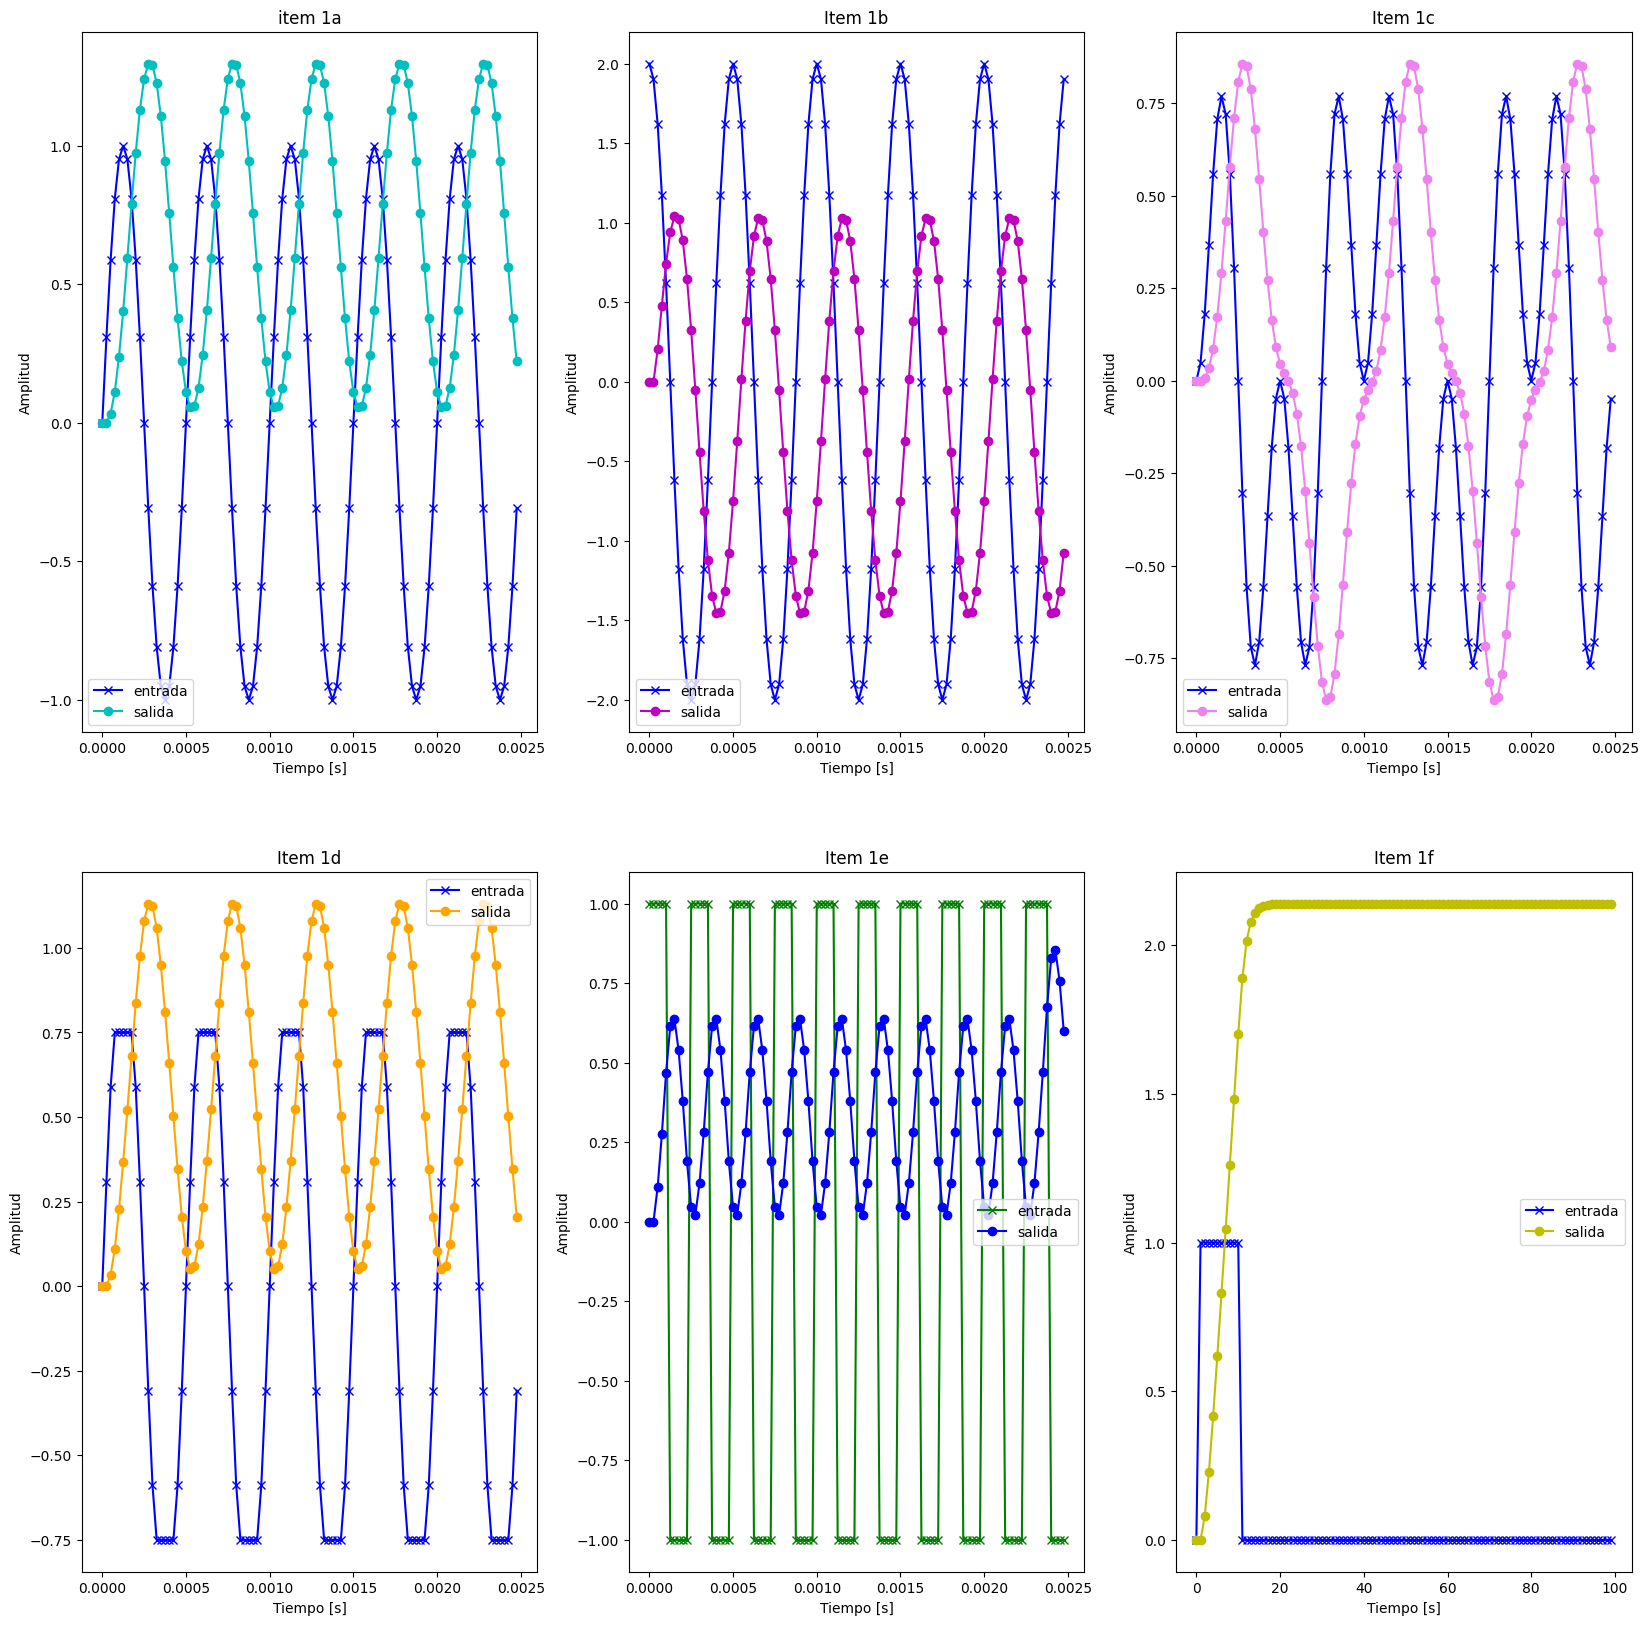

In [2]:
# %% ITEM 1A


import ts1funciones2 as ts1
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from scipy.signal import lfilter, unit_impulse

# %% Declaracion de variables

N=100
frecADC=40000
t1=11
t0=1



n=2 #
# %% Calculo de funciones


def mi_funcion_y1 (x):

    y=np.zeros(N) #primero me armo mi array solucion y lo inicializo en 0
    
    for n in range(2,len(x)):
#tanto mi entrada como mi salida es causal ==> para todo subindice <0 mi array vale 0
                
        #implementacion del zero padding --> puedo demorar mi array --> analizo cuantos 0 tengo que poner antes // puedo arrancar mi solucion a partir de indice positivo

        y[n] = (3e-2 * x[n] + 5e-2 * x[n-1] + 3e-2 * x[n-2] + 1.5 *y[n-1] - 0.5 * y[n-2])
    return y

#Invoco las funciones del tp anterior
#a) Una señal sinusoidal de 2KHz.
tta,fa=ts1.mi_funcion_sen(1,0,2000,0,N,frecADC)

y1=mi_funcion_y1(fa)

#b) Misma señal amplificada y desfazada en π/2.
ttb,fb=ts1.mi_funcion_sen(2,0,2000,np.pi/2,N,frecADC)

y2=mi_funcion_y1(fb)

#c) Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
ttc,fc=ts1.mi_funcion_item_C(1,0,2000,0,N,frecADC)

y3=mi_funcion_y1(fc)

#d) Señal anterior recortada al 75% de su potencia (energia) 
ttd,fd=ts1.mi_funcion_item_D(1,0,2000,0,N,frecADC)

y4=mi_funcion_y1(fd)

#e) Una señal cuadrada de 4KHz.
tte,fe=ts1.mi_funcion_cuadrada(0, 4000, 0, N, frecADC = frecADC)

y5=mi_funcion_y1(fe)

#f) Un pulso rectangular de 10ms. --> NO HAY FRECUENCIA UN SOLO 
ff=ts1.mi_funcion_pulso(t0,t1,N,1)
y6=mi_funcion_y1(ff)

#%% Graficos item 1

plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.title('item 1a')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(tta, fa,'x-', color ='b', label='entrada')
plt.plot(tta, y1,'o-', color ='c', label='salida')
plt.legend()

plt.subplot(2,3,2)
plt.title('Item 1b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(ttb,fb,'x-', color ='b', label='entrada')
plt.plot(ttb,y2,'o-', color ='m', label='salida')
plt.legend()

plt.subplot(2,3,3)
plt.title('Item 1c')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(ttc,fc,'x-', color ='b', label='entrada')
plt.plot(ttc,y3,'o-', color ='violet', label='salida')
plt.legend()

plt.subplot(2,3,4)
plt.title('Item 1d')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(ttd,fd,'x-', color= 'b', label='entrada')
plt.plot(ttd,y4,'o-', color= 'orange', label='salida')
plt.legend()

plt.subplot(2,3,5)
plt.title('Item 1e')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(tte,fe,'x-', color ='green', label='entrada')
plt.plot(tte,y5,'o-', color ='b', label='salida')
plt.legend()

plt.subplot(2,3,6)
plt.title('Item 1f')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(ff,'x-', color = 'b', label='entrada')
plt.plot(y6,'o-', color = 'y', label='salida')
plt.legend()

# Calculo de la potencia
def potencia (ts, xx, item,fs=frecADC):
    print('----Datos item', item, '-------')
    print ('Tiempo de simulacion:', ts, 'segundos')
    print ('Potencia de la señal:', np.mean(xx**2))
    print ('Frecuencia de muestreo:', fs, 'Hz')
    print('------------------------')
    
potencia(max(tta),y1,'a')
potencia(max(ttb),y2,'b')
potencia(max(ttc),y3,'c')
potencia(max(ttd),y4,'d')
potencia(max(tte),y5,'e')
potencia(0.01,y6,'f')


A continuación, se realizó el cálculo de la salida mediante la respuesta al impulso. Para ello se utilizó la función lfilter del módulo signal, que devuelve la salida de un filtro digital. Recibe por parámetro los coeficientes de la entrada y de salida, y una entrada; en el caso específico de que esta última sea un impulso ($\delta [n]$), la función devuelve la respuesta al impulso h para ese sistema.

Una vez obtenida h, utilizo la función convolve para realizar la convolución con la entrada (x[n]) y obtener así la salida. Los resultados obtenidos se muestran a continuación.

C:\Users\lolyy\AppData\Local\Temp\ipykernel_40396\1338422120.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


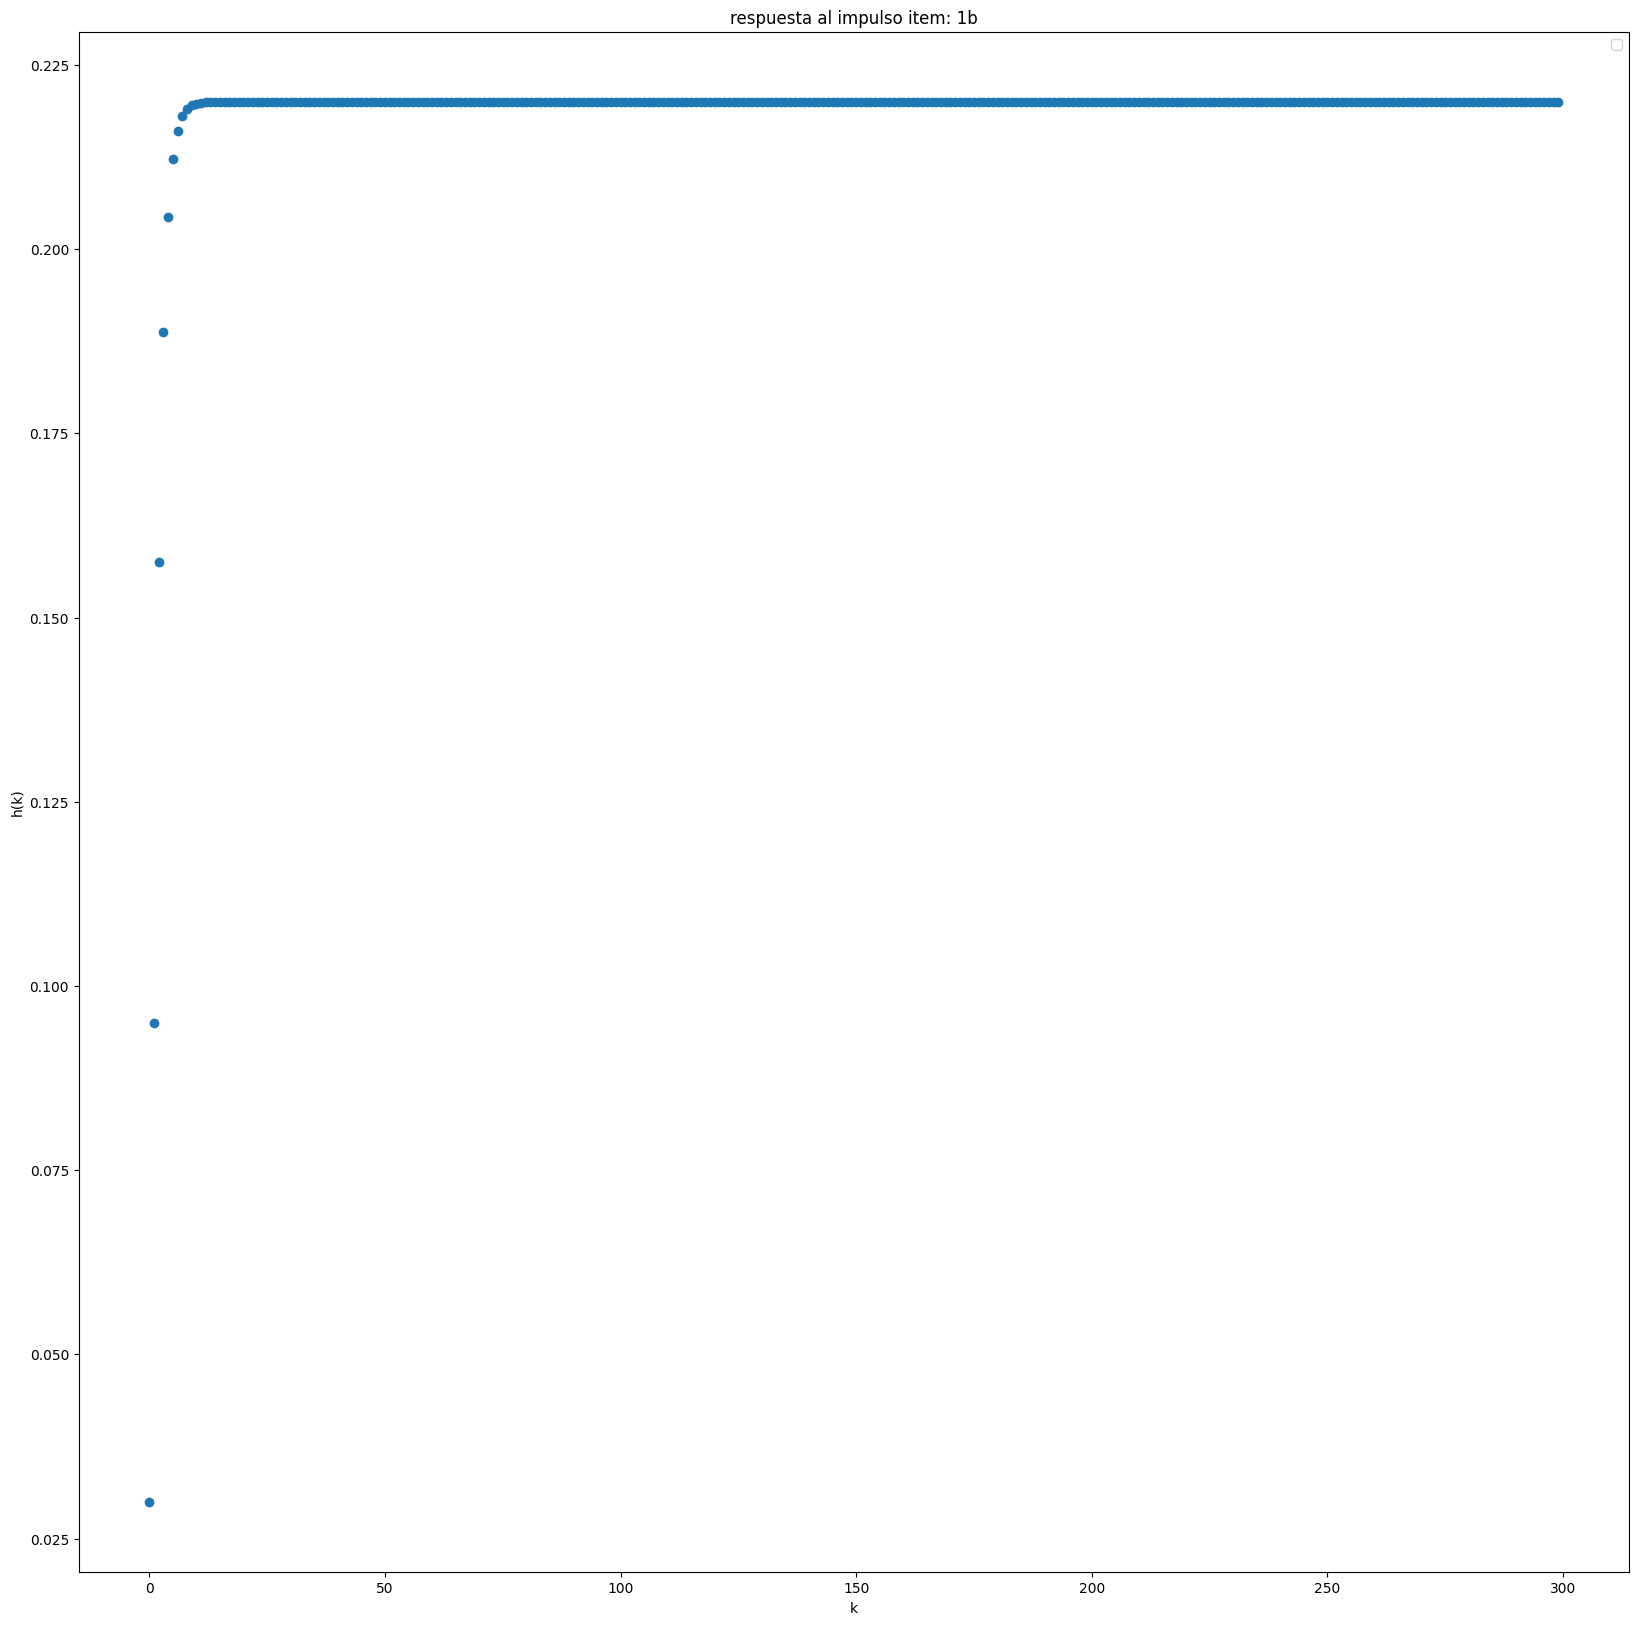

----Datos item a -------
Tiempo de simulacion: 0.00995 segundos
Potencia de la señal: 0.35277030510948143
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item b -------
Tiempo de simulacion: 0.00995 segundos
Potencia de la señal: 0.46955730261971995
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item c -------
Tiempo de simulacion: 0.00995 segundos
Potencia de la señal: 0.1307318658707135
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item d -------
Tiempo de simulacion: 0.00995 segundos
Potencia de la señal: 0.2674856879815141
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item e -------
Tiempo de simulacion: 0.00995 segundos
Potencia de la señal: 0.22365923252422437
Frecuencia de muestreo: 40000 Hz
------------------------
----Datos item f -------
Tiempo de simulacion: 0.01 segundos
Potencia de la señal: 3.5721366012687916
Frecuencia de muestreo: 40000 Hz
------------------------


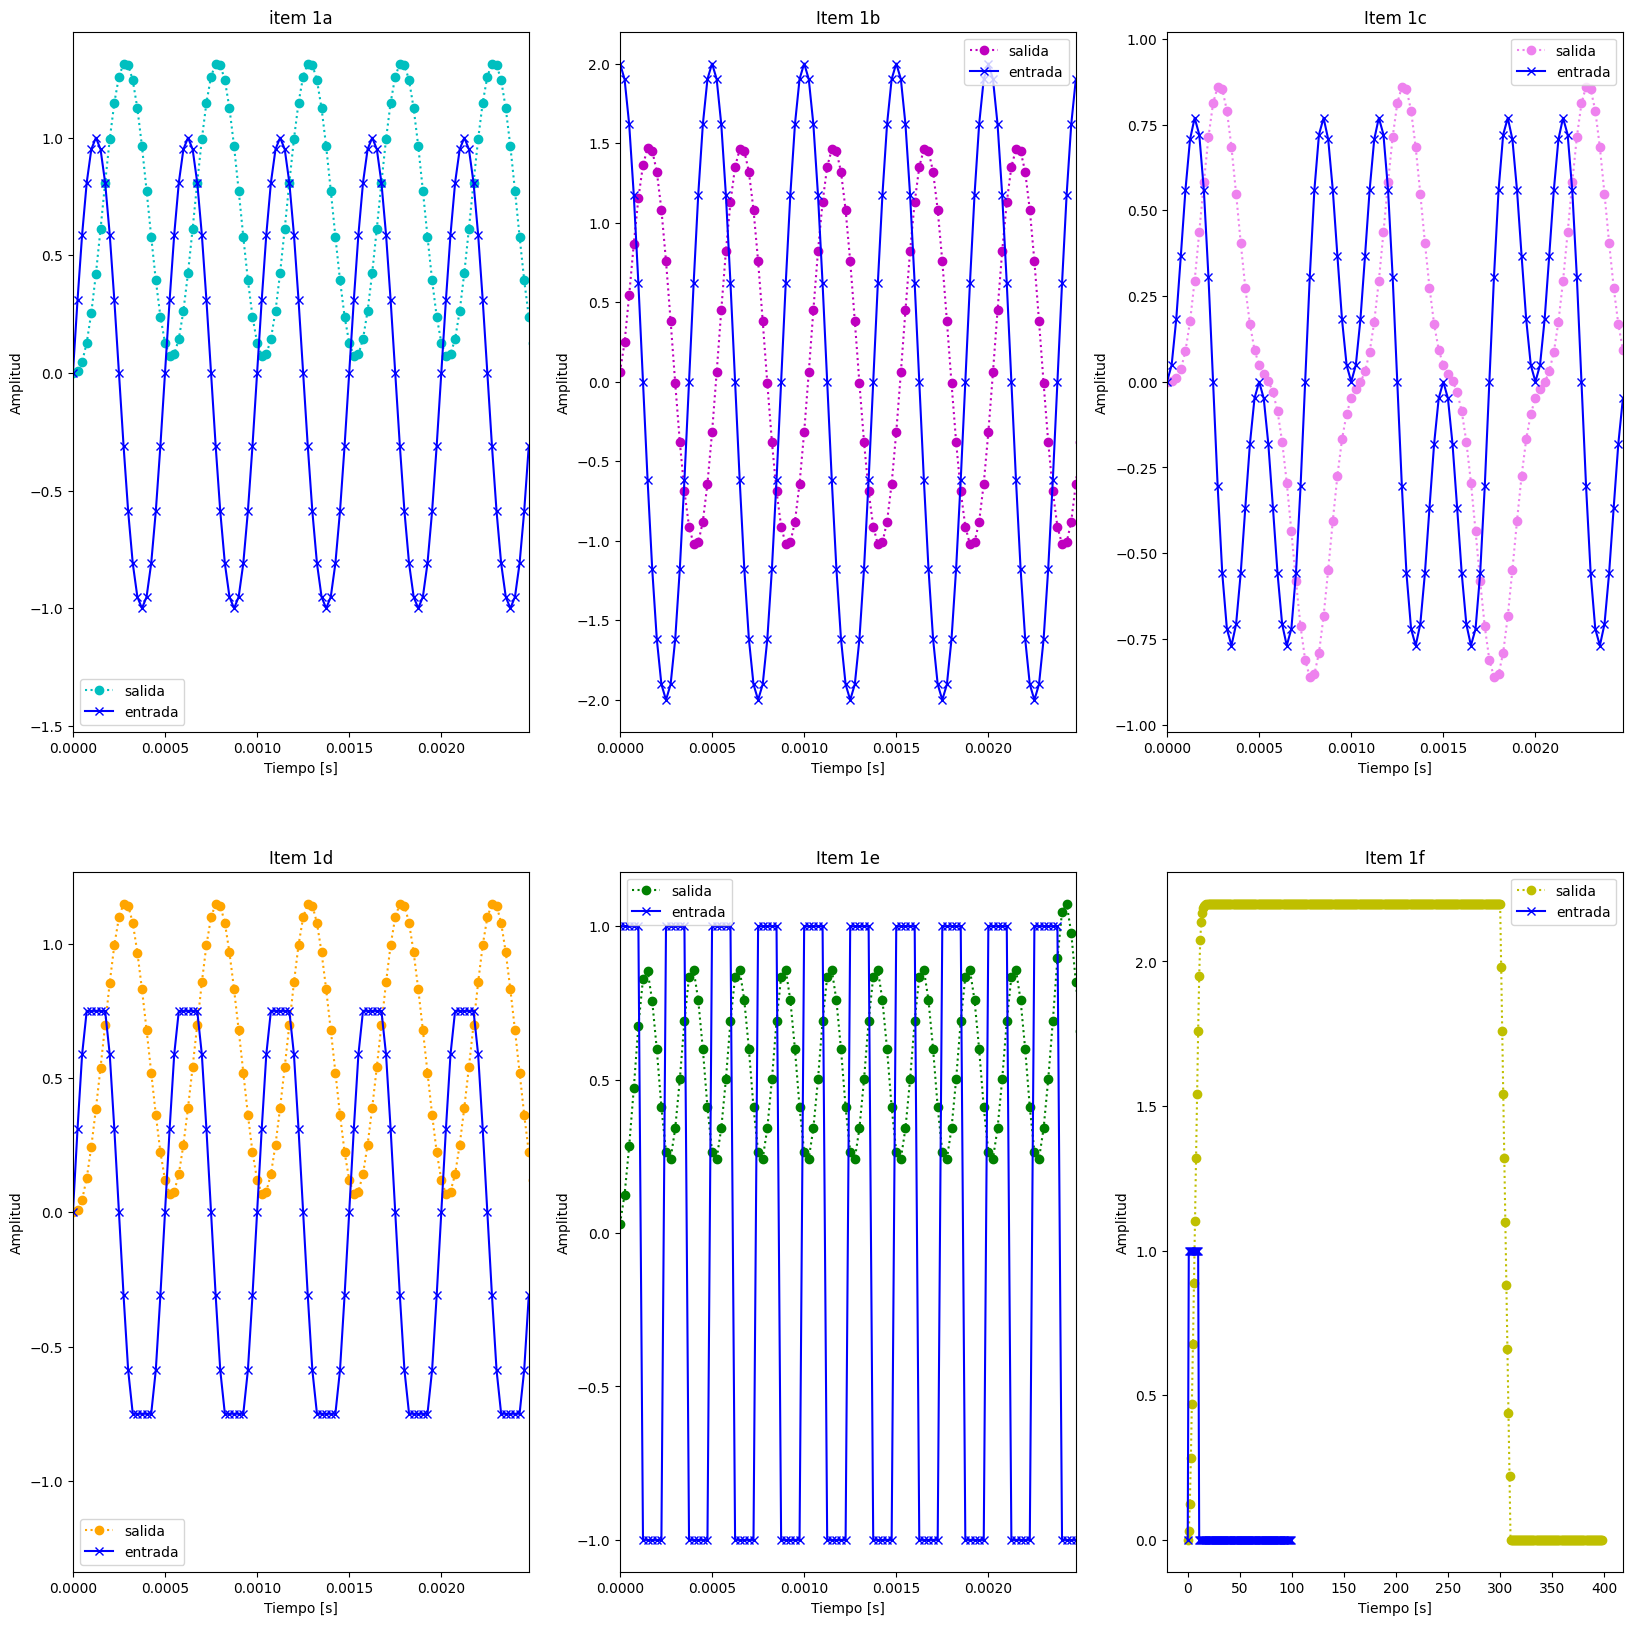

In [10]:
# %% Item 1b
def mi_funcion_resp_imp (a,b, item):

    d = unit_impulse(3*N)
    h = lfilter(b, a, d)
    
    plt.figure(figsize=(20,20))
    plt.scatter(np.arange(0,3*N,1),h)
    plt.xlabel('k')
    plt.ylabel('h(k)')
    plt.title('respuesta al impulso item: '+item)
    plt.legend()
    plt.show()
    return h


#construyo mi filtro
b= [0.03, 0.05, 0.03]      # Coeficientes de entrada (x)
a = [1.0, -1.5, 0.5]        # Coeficientes de salida (y)
h=mi_funcion_resp_imp(a,b, '1b')


#hago la convolucion de la respuesta al impulso y mi entrada para obtener mi salida
yy1=np.convolve(fa, h)

yy2=np.convolve(fb, h)

yy3=np.convolve(fc, h)

yy4=np.convolve(fd, h)

yy5=np.convolve(fe, h)

yy6=np.convolve(ff, h)

#grafico mi salida
t_conv1 = np.arange(len(yy1)) / frecADC
t_conv2 = np.arange(len(yy2)) / frecADC
t_conv3 = np.arange(len(yy3)) / frecADC
t_conv4 = np.arange(len(yy4)) / frecADC
t_conv5 = np.arange(len(yy5)) / frecADC
dt = 1/frecADC
t = np.arange(len(fa)) * dt


#grafico mi salida
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('item 1a')
plt.xlabel('Tiempo [s]')
plt.xlim(0,max (tta))
plt.ylabel('Amplitud')
plt.plot(t_conv1,yy1,'o:', color ='c', label='salida')
plt.plot(tta,fa,'x-', color = 'b', label='entrada')
plt.legend()

plt.subplot(2,3,2)
plt.title('Item 1b')
plt.xlabel('Tiempo [s]')
plt.xlim(0,max (ttb))
plt.ylabel('Amplitud')
plt.plot(t_conv2, yy2,'o:', color ='m', label='salida')
plt.plot(ttb,fb,'x-', color = 'b', label='entrada')
plt.legend()

plt.subplot(2,3,3)
plt.title('Item 1c')
plt.xlabel('Tiempo [s]')
plt.xlim(0,max (ttc))
plt.ylabel('Amplitud')
plt.plot(t_conv3,yy3,'o:', color ='violet', label='salida')
plt.plot(ttc,fc,'x-', color = 'b', label='entrada')
plt.legend()

plt.subplot(2,3,4)
plt.title('Item 1d')
plt.xlabel('Tiempo [s]')
plt.xlim(0,max (ttd))
plt.ylabel('Amplitud')
plt.plot(t_conv4,yy4,'o:', color= 'orange', label='salida')
plt.plot(ttd,fd,'x-', color = 'b', label='entrada')
plt.legend()

plt.subplot(2,3,5)
plt.title('Item 1e')
plt.xlabel('Tiempo [s]')
plt.xlim(0,max (tte))
plt.ylabel('Amplitud')
plt.plot(t_conv5,yy5,'o:', color ='green', label='salida')
plt.plot(tte,fe,'x-', color = 'b', label='entrada')
plt.legend()

plt.subplot(2,3,6)
plt.title('Item 1f')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(yy6,'o:', color = 'y', label='salida')
plt.plot(ff,'x-', color = 'b', label='entrada')
plt.legend()
   
potencia(max(t_conv1),yy1,'a')
potencia(max(t_conv2),yy2,'b')
potencia(max(t_conv3),yy3,'c')
potencia(max(t_conv4),yy4,'d')
potencia(max(t_conv5),yy5,'e')
potencia(0.01,yy6,'f')


En las ecuaciones 2 y 3 se realizó un procedimiento análogo al inciso 1b. El procedimiento y los resultados obtenidos se muestran a continuación:

C:\Users\lolyy\AppData\Local\Temp\ipykernel_40396\1338422120.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


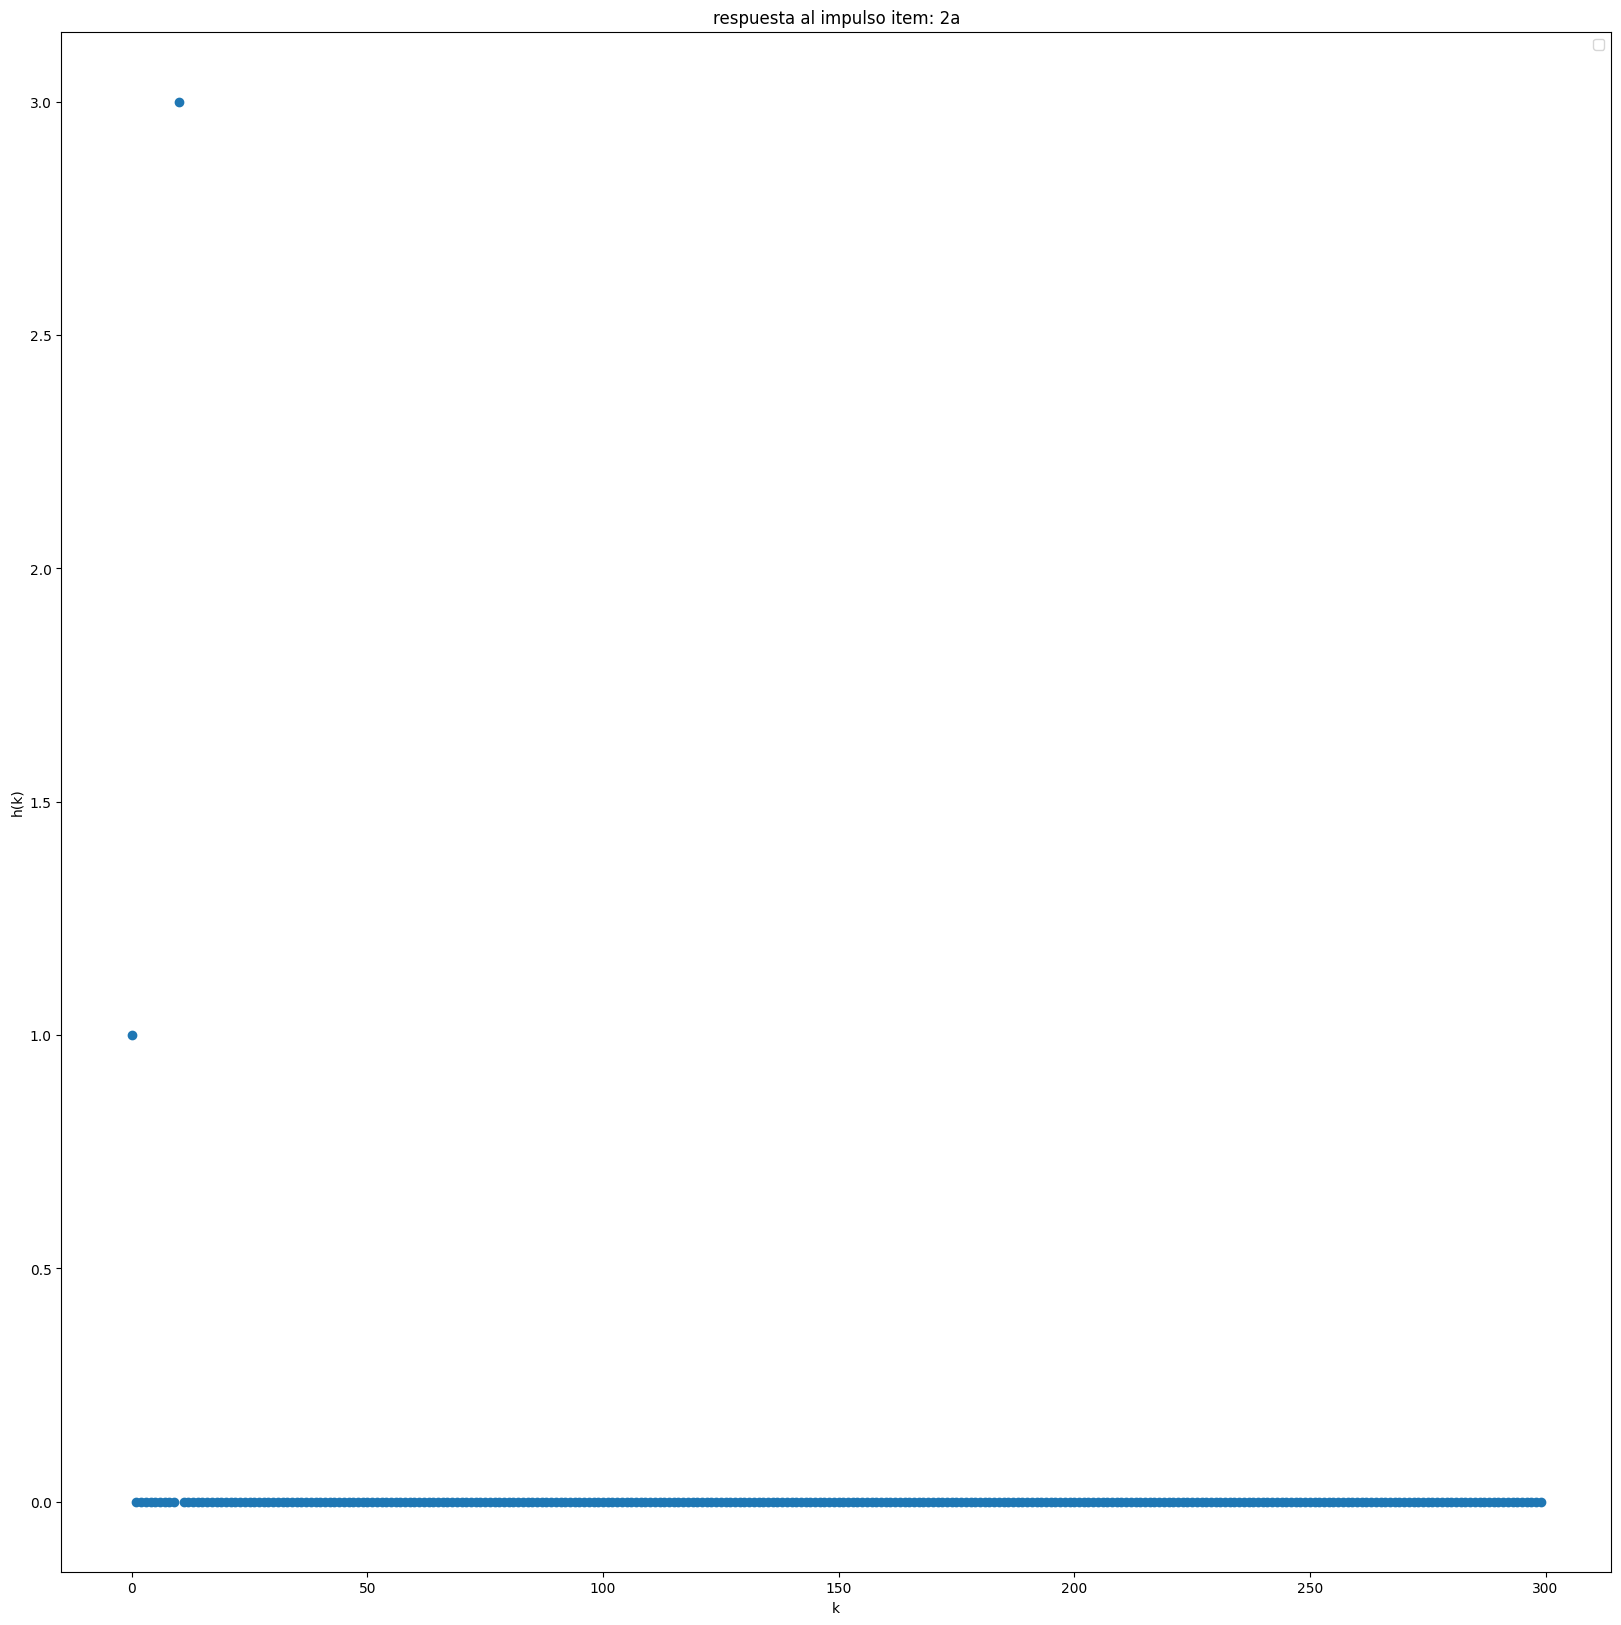

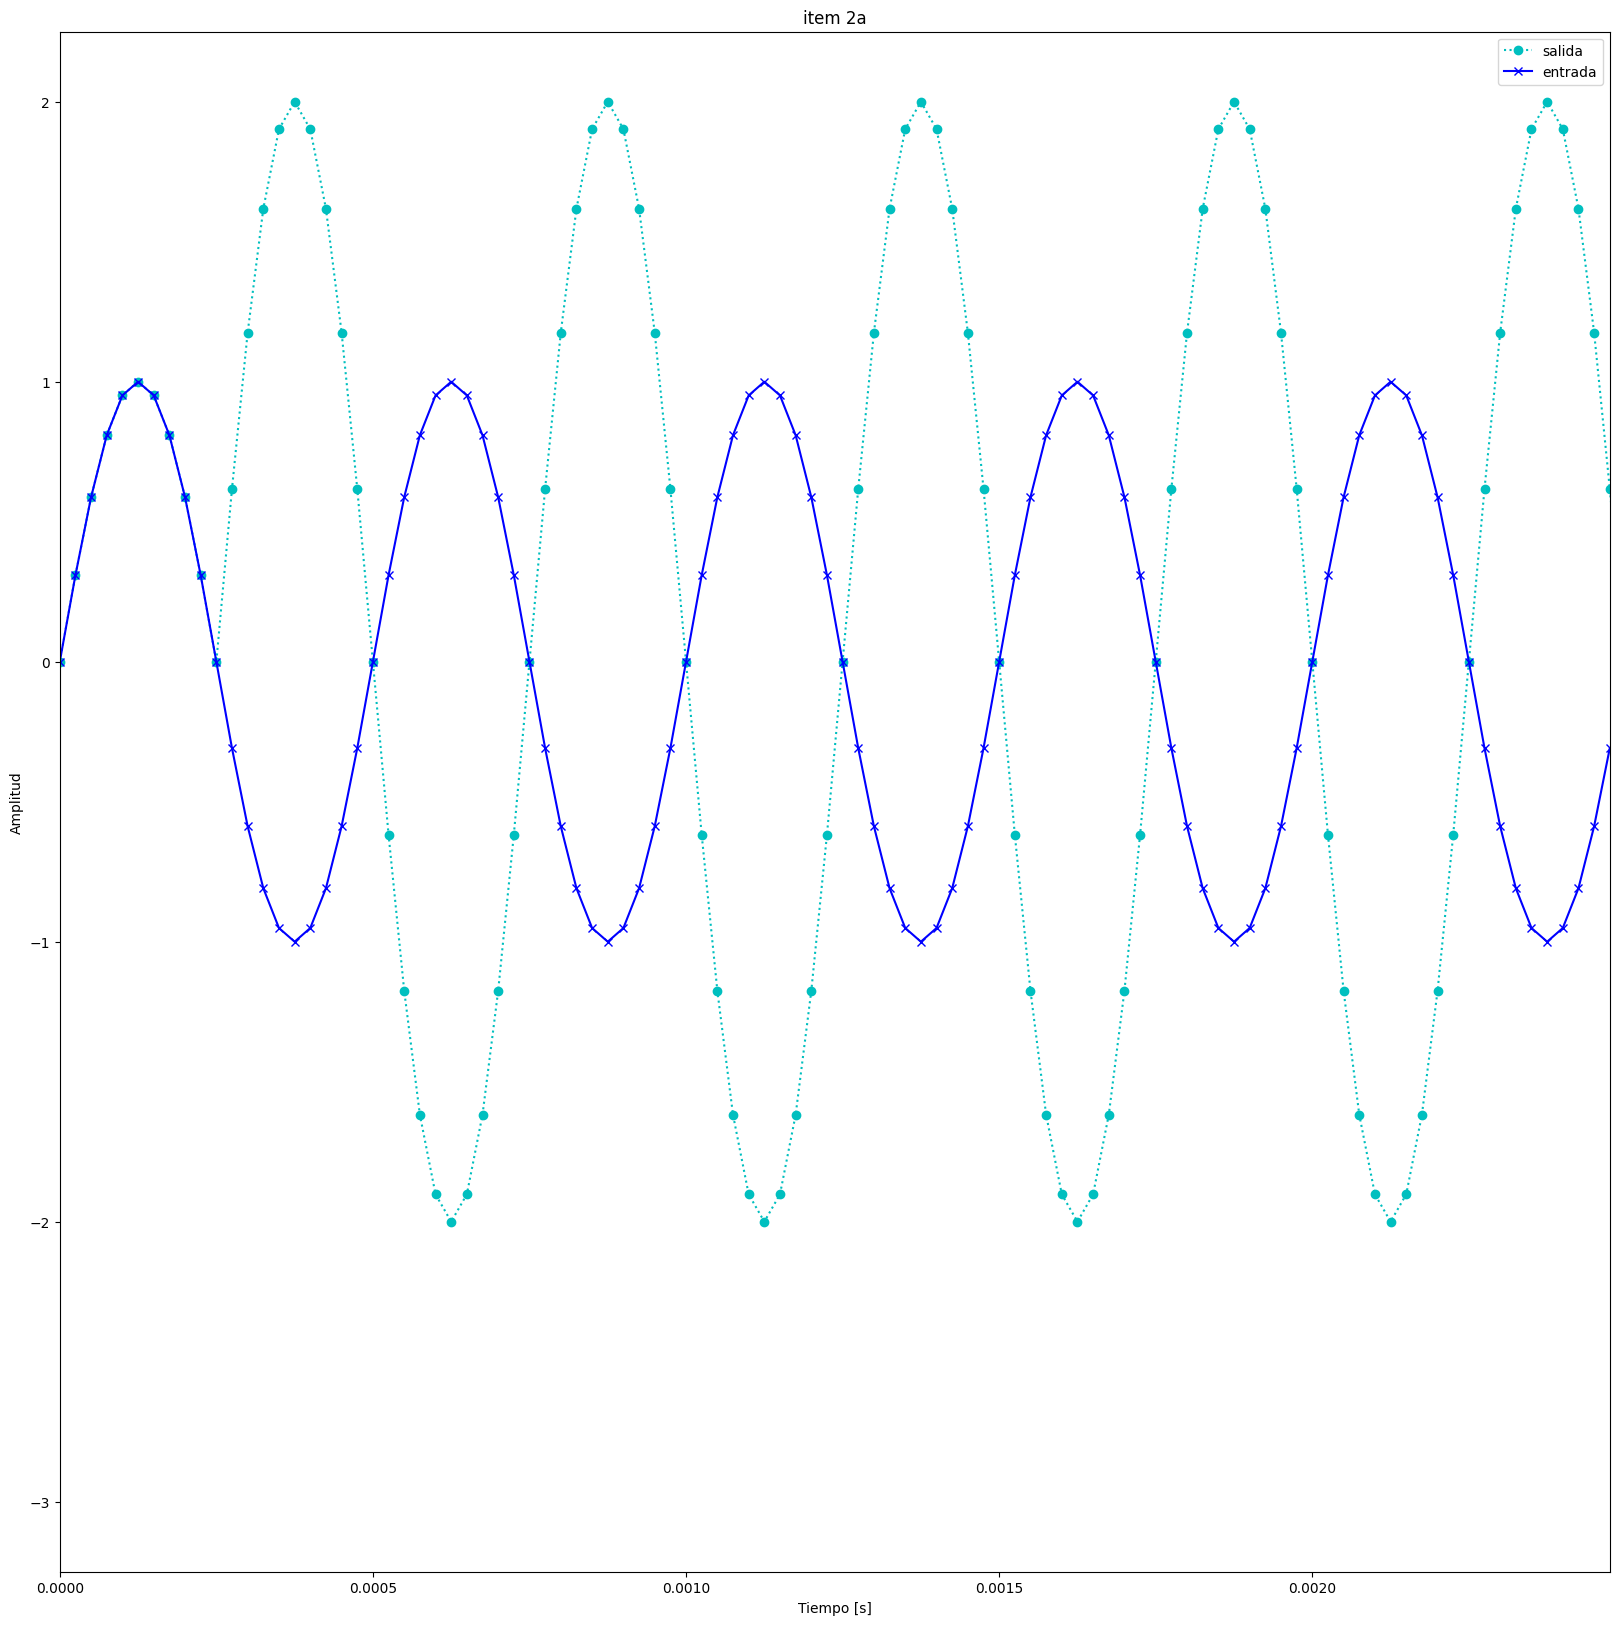

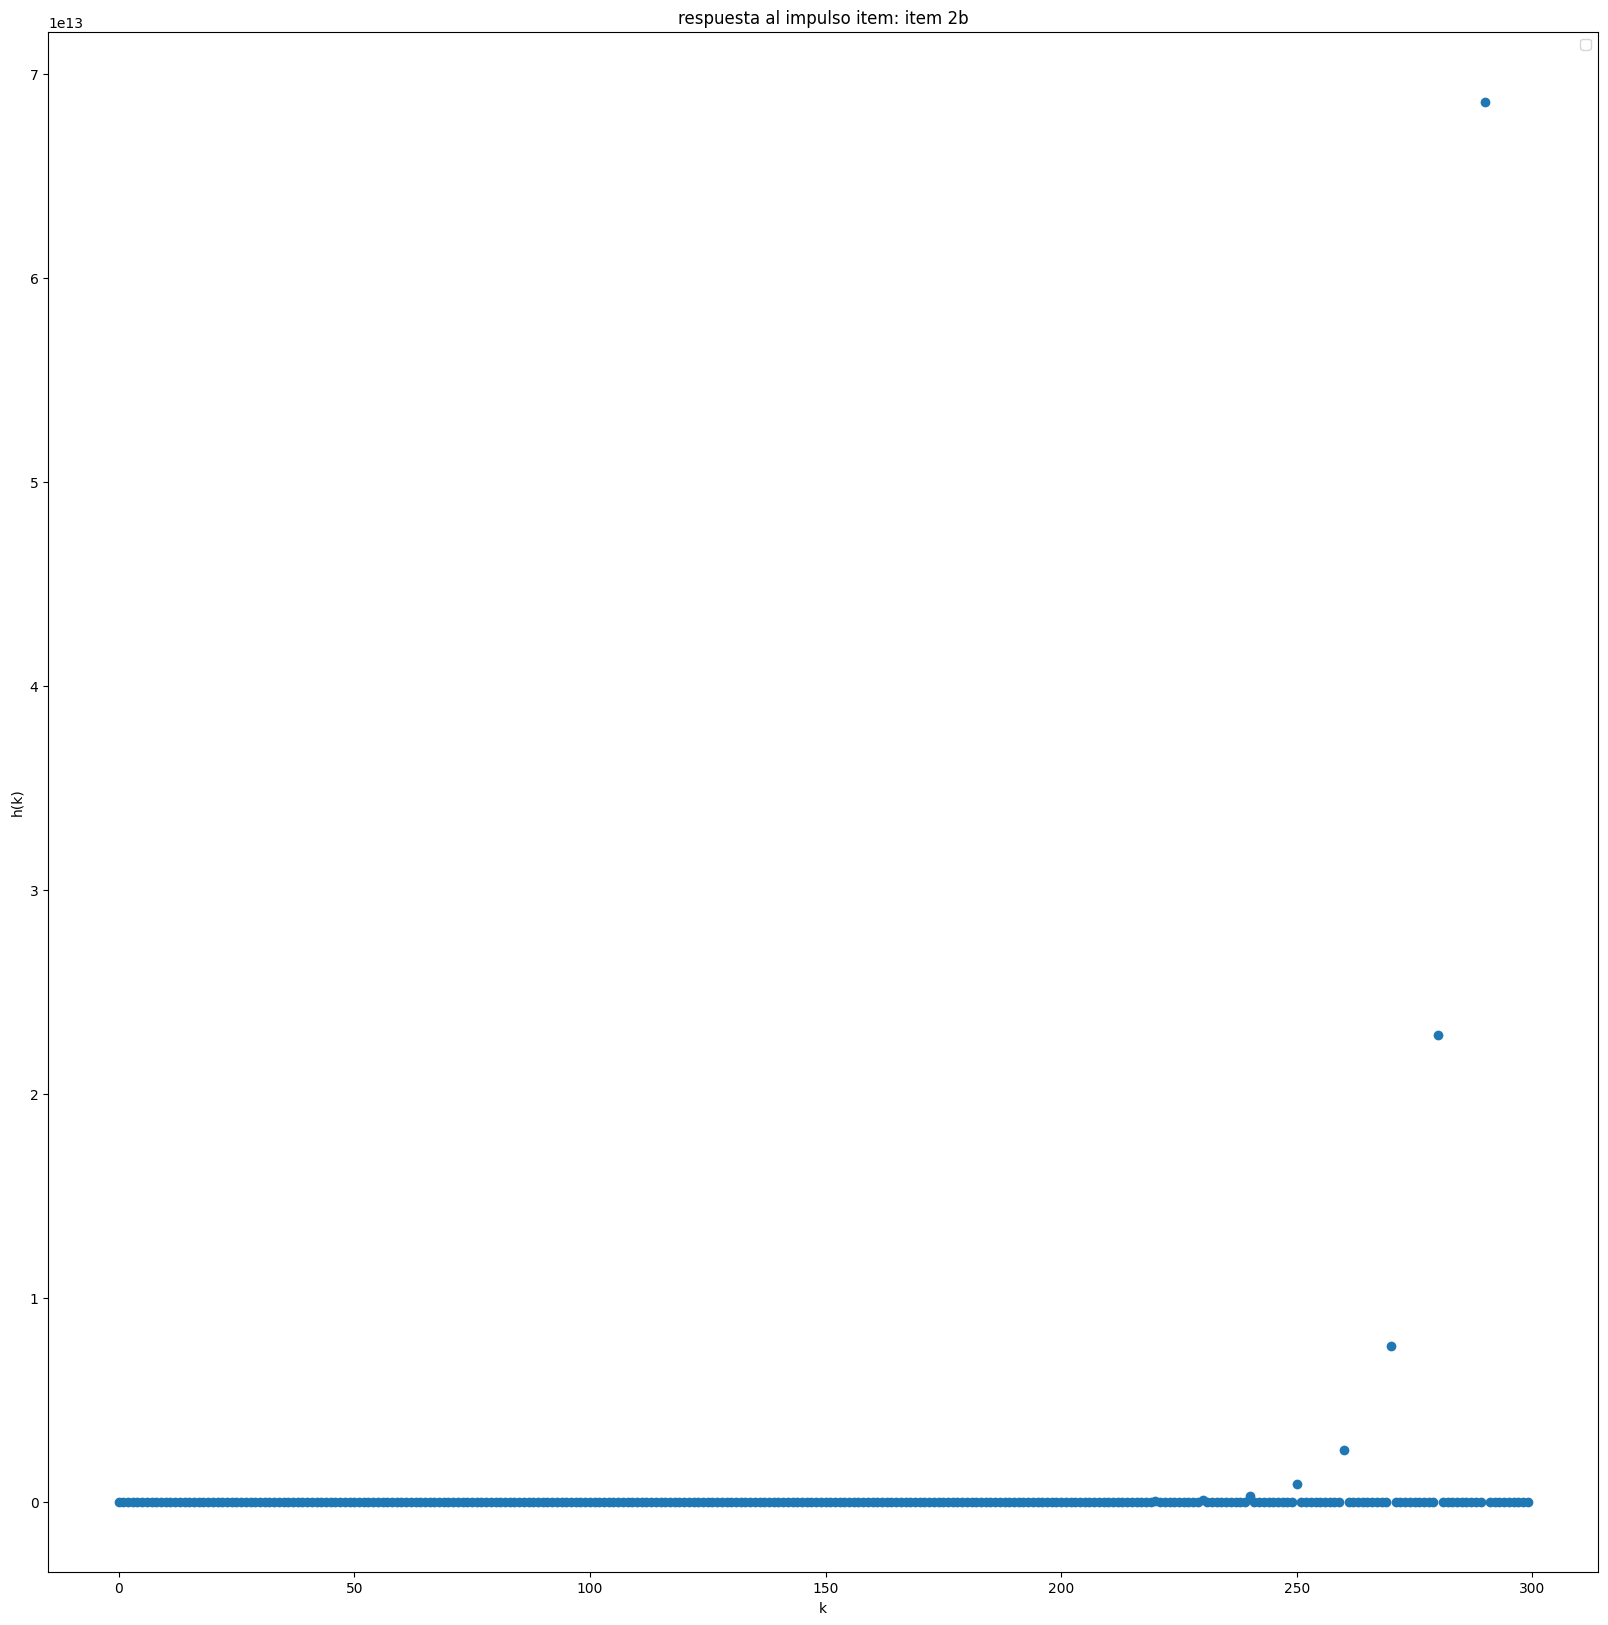

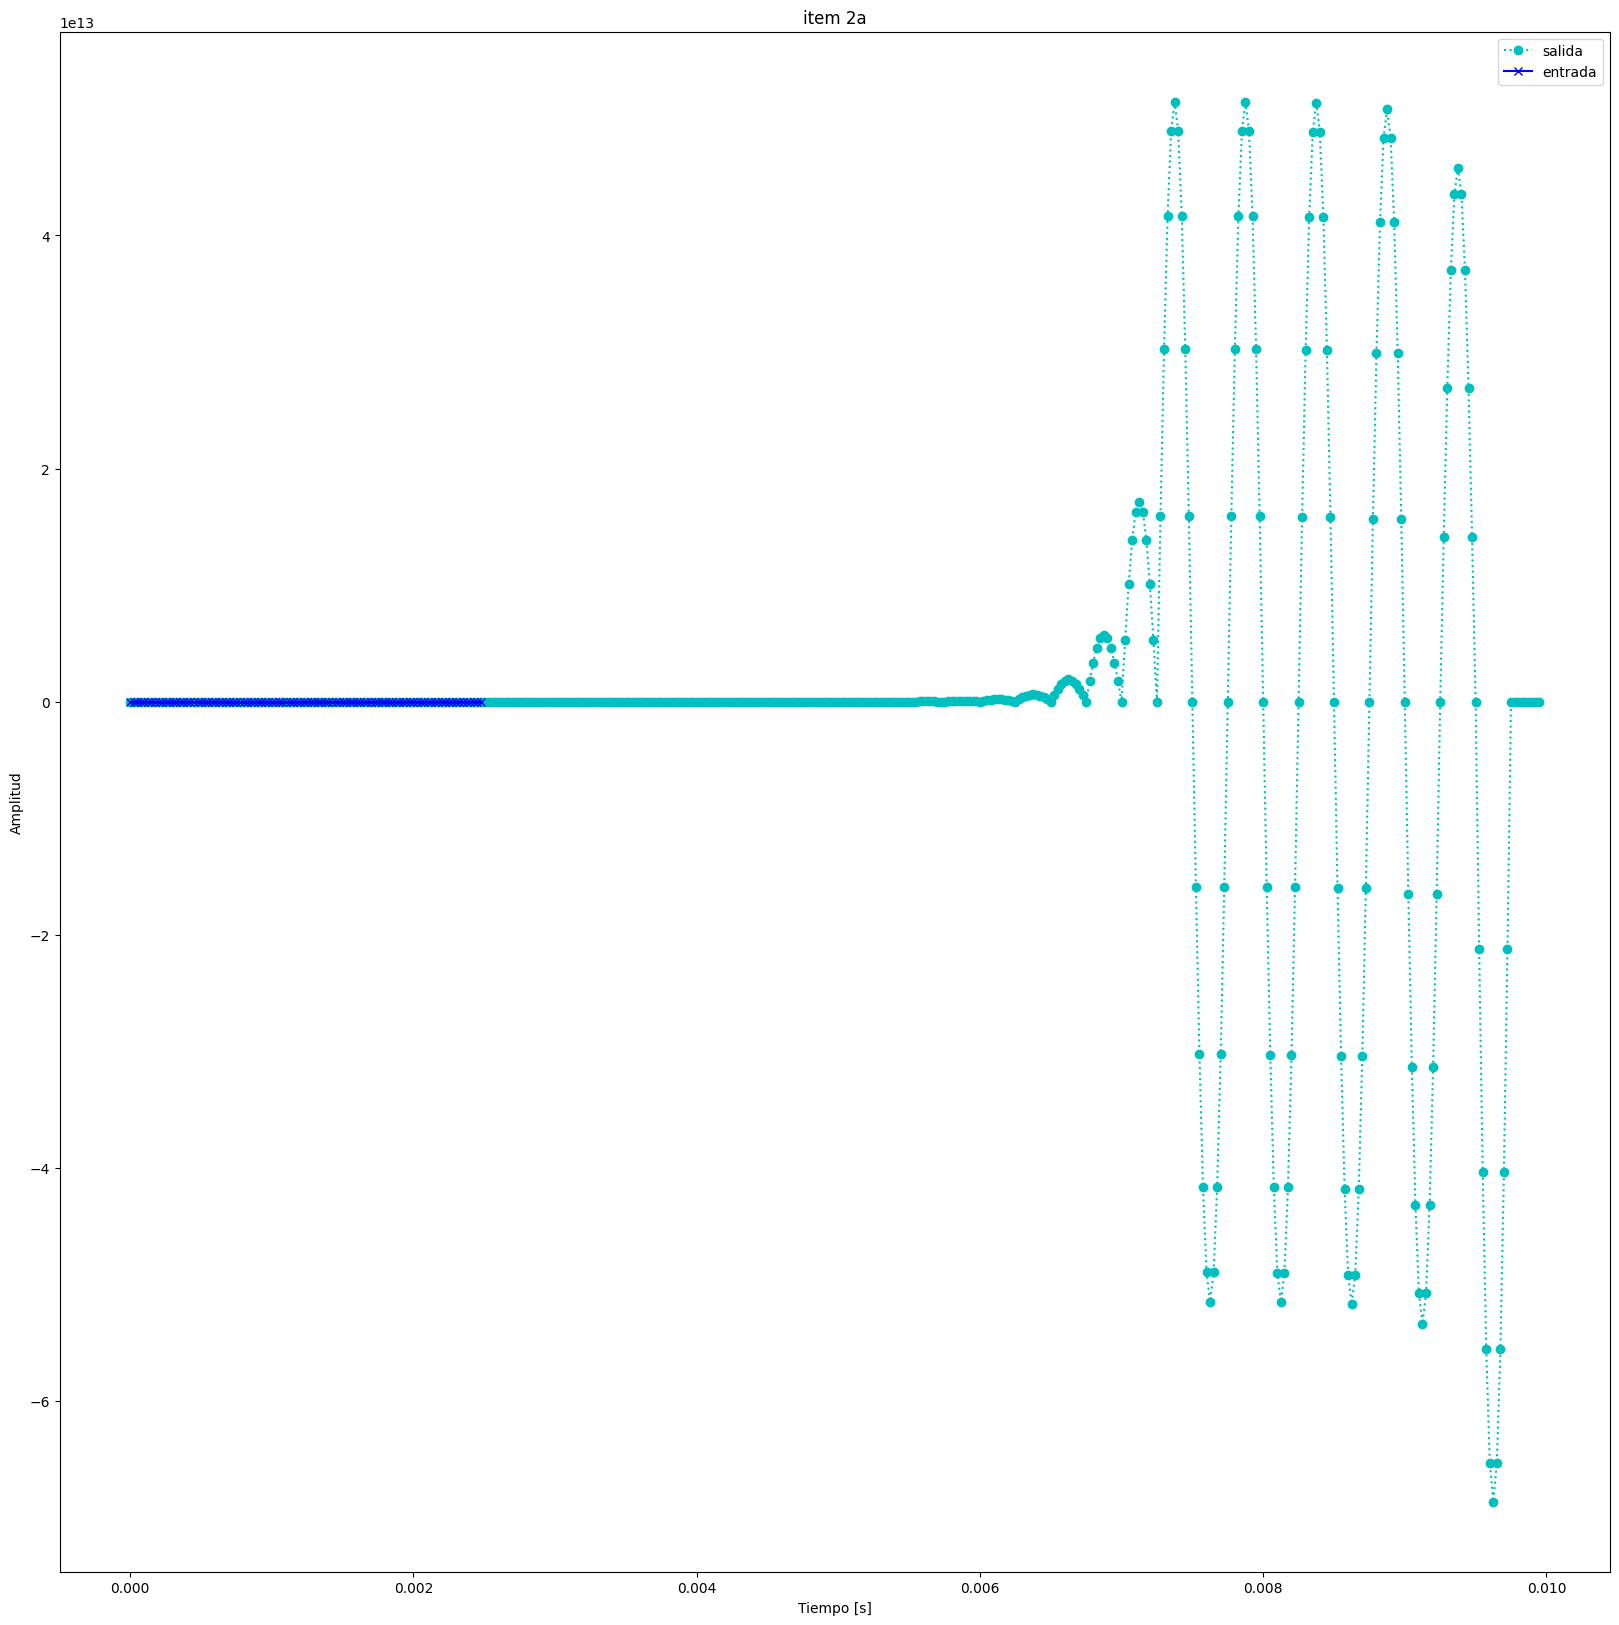

In [11]:
# %% Item 2

#calculo mi fun a traves de la resp al impulso
b = [1,0,0,0,0,0,0,0,0,0,3]     
a = [1.0]        
h=mi_funcion_resp_imp(a,b, '2a')
y2a = np.convolve(fa, h)

t_conv2a = np.arange(len(y2a)) / frecADC


#grafico item 2a
plt.figure(figsize=(20,20))
plt.title('item 2a')
plt.xlabel('Tiempo [s]')
plt.xlim(0, max(tta))
plt.ylabel('Amplitud')
plt.plot(t_conv2a,y2a,'o:', color ='c', label='salida')
plt.plot(tta,fa,'x-', color = 'b', label='entrada')
plt.legend()


#item 2b
b = [1.0]      # Coeficientes de entrada (x)
a = [1,0,0,0,0,0,0,0,0,0,-3]        # Coeficientes de salida (y)

h=mi_funcion_resp_imp(a,b, 'item 2b')

y2b = np.convolve(fa, h)
t_conv2b = np.arange(len(y2b)) / frecADC

#grafico item 2b
plt.figure(figsize=(20,20))
plt.title('item 2a')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
#plt.xlim(0, max(tta))
plt.plot(t_conv2,y2b,'o:', color ='c', label='salida')
plt.plot(tta,fa,'x-', color = 'b', label='entrada')
plt.legend()


# IV. **Conclusiones**

En resumen, para el primer inciso se puede observar que, con la cantidad de muestras establecida, se obtienen las mismas gráficas, tanto para la salida calculada mediante el método directo (reemplazando en la ecuación en diferencias), como para la obtenida mediante la respuesta al impulso.

La función de convolución tiene tres modos de configuración:

**Valid**: devuelve una salida de longitud $max (M, N) − min (M, N) + 1$. El producto de convolución solo se proporciona para los puntos donde las señales se superponen completamente.


**Same**: devuelve una salida de longitud max(M,N). Retorna los valores para los cuales la entrada tiene la misma longitud que la respuesta al impulso.


**Full**: devuelve la convolución en cada punto de superposición, con una forma de salida de N+M−1.


En este caso se utilizó el modo por defecto (full), y luego se realizó un filtrado para generar el gráfico. La cantidad de puntos válidos del producto de convolución es N−M, donde N es la cantidad de valores que tiene la entrada y M la cantidad de valores que tiene la función con la cual se realiza la convolución. Para lograr el análisis correcto, se sintetizó un impulso de 3N cantidad de puntos. Además, se graficó la respuesta al impulso, y se obtuvo lo esperado, un h que crece asintóticamente.

Respecto al segundo inciso, se puede observar que el primer gráfico corresponde a un sistema FIR, donde la salida se comporta de forma limitada. Por el contrario, en el segundo gráfico se observa el comportamiento de un sistema IIR, donde la salida depende recursivamente de los valores anteriores de la misma.

En este último caso, se observa una salida que crece de manera abrupta y demorada, llegando a un máximo que es 15 veces el valor de la entrada. Este comportamiento es típico de un sistema inestable. Este comportamiento también se ve descrito en la respuesta al impulso h, que posee un gráfico exponencial creciente, típico de un sistema inestable.

# V. **Autoevalución**

•	Resolví la tarea, pero tengo dudas.
•	Al hacer esta tarea aprendí sobre la clasificación de sistemas, ecuaciones en diferencias y los métodos para calcular la salida.
•	Me quedo clara la implementación de la respuesta al impulso (como diría Holton, es como preguntarle a una persona una sola pregunta y saber todo sobre ella). Me cuesta todavía saber que esperar cada vez que hago un gráfico.
•	Utilice inteligencia artificial, Copilot en particular. Para la escritura en Latex más que nada.
